<a href="https://colab.research.google.com/github/BhanuBhati/COVID_DA/blob/main/COVID_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
covid_dataset_url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/ecdc/new_deaths.csv"
covid_dataset_csv = pd.read_csv(covid_dataset_url)

In [ ]:
covid_dataset_csv.head()

In [ ]:
covid_dataset_csv = covid_dataset_csv.transpose()

In [ ]:
covid_dataset_csv = covid_dataset_csv.loc["date"]

In [ ]:
covid_dataset_csv.drop(["World","date"], inplace=True)

In [ ]:
covid_dataset_csv.fillna(0, inplace=True)

In [ ]:
#Adding countrywise max deaths to dataset
max_deaths = []
for country in covid_dataset_csv.index:
  max_deaths.append(covid_dataset_csv.loc[country].max())
covid_dataset_csv["max_deaths"] = max_deaths

In [ ]:
covid_data = pd.DataFrame(covid_dataset_csv["max_deaths"])
covid_data.head()

,max_deaths
Afghanistan,56.0
Albania,19.0
Algeria,42.0
Andorra,6.0
Angola,13.0


In [ ]:
covid_data.loc["United States"]

max_deaths    4928.0
Name: United States, dtype: float64

In [ ]:
#Importing World Happiness Dataset from https://data.world/promptcloud/world-happiness-report-2019. (Requires sign in)
happiness_report_csv = pd.read_csv('https://query.data.world/s/rwynwlasdj3bo7tnq7dxplnrpcv7cr')

In [ ]:
happiness_report_csv.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [ ]:
happiness_report_csv.drop(["Ladder", "SD of Ladder", "Corruption", "Generosity", "Social support", "Negative affect", "Positive affect"], axis = 1, inplace=True)

In [ ]:
happiness_report_csv.set_index(happiness_report_csv["Country (region)"], inplace = True)

In [ ]:
happiness_report_csv.drop(["Country (region)"], axis = 1)

,Freedom,Log of GDP\nper capita,Healthy life\nexpectancy
Country (region),,,
Finland,5.0,22.0,27.0
Denmark,6.0,14.0,23.0
Norway,3.0,7.0,12.0
Iceland,7.0,15.0,13.0
Netherlands,19.0,12.0,18.0
...,...,...,...
Rwanda,21.0,132.0,103.0
Tanzania,78.0,125.0,118.0
Afghanistan,155.0,134.0,139.0


In [ ]:
data = happiness_report_csv.join(covid_data, how="inner")

In [ ]:
data.corr()

,Freedom,Log of GDP\nper capita,Healthy life\nexpectancy,max_deaths
Freedom,1.000000,0.399144,0.416219,-0.093267
Log of GDP\nper capita,0.399144,1.000000,0.848649,-0.165113
Healthy life\nexpectancy,0.416219,0.848649,1.000000,-0.223572
max_deaths,-0.093267,-0.165113,-0.223572,1.000000


Plotting GDP per capita vs. Max Deaths shows negative correlation (GDP increases, max deaths decreases)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


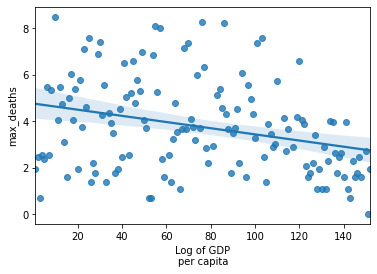

In [ ]:
x = data[data["max_deaths"]!=0]["Log of GDP\nper capita"]
y = data[data["max_deaths"]!=0]["max_deaths"]
sb.regplot(x,np.log(y))

Similarly plotting Life expectancy vs. Max Deaths shows negative correlation (Life expentancy increases, max deaths decreases)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


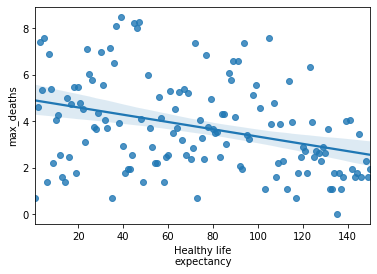

In [ ]:
x = data[data["max_deaths"]!=0]["Healthy life\nexpectancy"]
y = data[data["max_deaths"]!=0]["max_deaths"]
sb.regplot(x,np.log(y))